In [2]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            %matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('bmh')

In [3]:
import numpy as np
# Binary regular solution
def energy(H_ex, S_ex, L2_ex, T, x_a, x_b):
    return 8.3145*T*(x_a*np.log(x_a)+x_b*np.log(x_b)) + (H_ex - T*S_ex+L2_ex*T**3)*x_a*x_b

def entropy(H_ex, S_ex, L2_ex, T, x_a, x_b):
    return -(8.3145*(x_a*np.log(x_a)+x_b*np.log(x_b)) + (-S_ex)*x_a*x_b)

def enthalpy(H_ex, S_ex, L2_ex, T, x_a, x_b):
    return energy(H_ex, S_ex, L2_ex, T, x_a, x_b) + T*entropy(H_ex, S_ex, L2_ex, T, x_a, x_b)

In [4]:
import numpy as np
rng = np.random.RandomState(1769)

# True model parameters, known only by nature
true_H_ex = 7e3
true_S_ex = 5
true_L2_ex = 0

# Some generated "observed" data
# Dataset 1
n1 = 10
dataset1 = {
'n': n1,
'x_a': rng.random_sample((n1,)),
'T': rng.uniform(300, 2000, size=(n1,)),
'func': entropy
}
dataset1['x_b'] = 1 - dataset1['x_a']
# Dataset 2
n2 = 10
dataset2 = {
'n': n2,
'x_a': rng.random_sample((n2,)),
'T': rng.uniform(300, 2000, size=(n2,)),
'func': enthalpy
}
dataset2['x_b'] = 1 - dataset2['x_a']
# Dataset 3
n3 = 10
dataset3 = {
'n': n3,
'x_a': rng.random_sample((n3,)),
'T': 500,
'func': entropy
}
dataset3['x_b'] = 1 - dataset3['x_a']
# Dataset 4
n4 = 10
dataset4 = {
'n': n4,
'x_a': rng.random_sample((n4,)),
'T': 900,
'func': enthalpy
}
dataset4['x_b'] = 1 - dataset4['x_a']
# Dataset 5
n5 = 10
dataset5 = {
'n': n5,
'x_a': rng.random_sample((n5,)),
'T': 1000,
'func': entropy
}
dataset5['x_b'] = 1 - dataset5['x_a']
# Dataset 6
n6 = 10
dataset6 = {
'n': n6,
'x_a': rng.random_sample((n6,)),
'T': 1200,
'func': enthalpy
}
dataset6['x_b'] = 1 - dataset6['x_a']
# Dataset 7
n7 = 10
dataset7 = {
'n': n7,
'x_a': rng.random_sample((n7,)),
'T': 1400,
'func': entropy
}
dataset7['x_b'] = 1 - dataset7['x_a']
# Dataset 8
n8 = 10
dataset8 = {
'n': n8,
'x_a': rng.random_sample((n8,)),
'T': 1600,
'func': enthalpy
}
dataset8['x_b'] = 1 - dataset8['x_a']
# Dataset 9
n9 = 10
dataset9 = {
'n': n9,
'x_a': rng.random_sample((n9,)),
'T': 1800,
'func': entropy
}
dataset9['x_b'] = 1 - dataset9['x_a']
# Dataset 10
n10 = 10
dataset10 = {
'n': n10,
'x_a': rng.random_sample((n10,)),
'T': 1900,
'func': enthalpy
}
dataset10['x_b'] = 1 - dataset10['x_a']

# Observed quantities: true value plus noise
noise1 = rng.normal(0, 0.1, size=dataset1['n'])
noise2 = rng.normal(0, 10, size=dataset2['n'])
noise3 = rng.normal(0, 0.1, size=dataset3['n'])
noise4 = rng.normal(0, 10, size=dataset4['n'])
noise5 = rng.normal(0, 0.1, size=dataset5['n'])
noise6 = rng.normal(0, 10, size=dataset6['n'])
noise7 = rng.normal(0, 0.1, size=dataset7['n'])
noise8 = rng.normal(0, 10, size=dataset8['n'])
noise9 = rng.normal(0, 0.1, size=dataset9['n'])
noise10 = rng.normal(0, 10, size=dataset10['n'])
dataset1['value'] = entropy(true_H_ex, true_S_ex, true_L2_ex, dataset1['T'], dataset1['x_a'], dataset1['x_b']) + noise1
dataset2['value'] = enthalpy(true_H_ex, true_S_ex, true_L2_ex, dataset2['T'], dataset2['x_a'], dataset2['x_b']) + noise2
dataset3['value'] = entropy(true_H_ex, true_S_ex, true_L2_ex, dataset3['T'], dataset3['x_a'], dataset3['x_b']) + noise3
dataset4['value'] = enthalpy(true_H_ex, true_S_ex, true_L2_ex, dataset4['T'], dataset4['x_a'], dataset4['x_b']) + noise4
dataset5['value'] = entropy(true_H_ex, true_S_ex, true_L2_ex, dataset5['T'], dataset5['x_a'], dataset5['x_b']) + noise5
dataset6['value'] = enthalpy(true_H_ex, true_S_ex, true_L2_ex, dataset6['T'], dataset6['x_a'], dataset6['x_b']) + noise6
dataset7['value'] = entropy(true_H_ex, true_S_ex, true_L2_ex, dataset7['T'], dataset7['x_a'], dataset7['x_b']) + noise7
dataset8['value'] = enthalpy(true_H_ex, true_S_ex, true_L2_ex, dataset8['T'], dataset8['x_a'], dataset8['x_b']) + noise8
dataset9['value'] = entropy(true_H_ex, true_S_ex, true_L2_ex, dataset9['T'], dataset9['x_a'], dataset9['x_b']) + noise9
dataset10['value'] = enthalpy(true_H_ex, true_S_ex, true_L2_ex, dataset10['T'], dataset10['x_a'], dataset10['x_b']) + noise10
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6, dataset7, dataset8, dataset9, dataset10]

In [24]:
# Priors on unknown parameters
from pymc3 import Normal, Gamma, Potential, sample, Model, NUTS, find_MAP
with Model() as phase_model:
    H_ex = Normal('H_ex', mu=0, sd=1000)
    S_ex = Normal('S_ex', mu=0, sd=50)
    L2_ex = Normal('L2_ex', mu=0, sd=10)
    ds_var = Gamma('ds_var', alpha=np.full_like(datasets, 0.1, dtype=np.float), beta=np.full_like(datasets, 0.1, dtype=np.float), shape=len(datasets))
    # datasets is defined elsewhere
    e = []
    for idx, dataset in enumerate(datasets):
        e.append(Potential('e_{}'.format(idx), -(np.square(dataset['func'](H_ex, S_ex, L2_ex, dataset['T'], dataset['x_a'], dataset['x_b']) - dataset['value'])).mean() / ds_var[idx]))

In [25]:
from pymc3 import Metropolis, find_MAP
with phase_model:
    #start = find_MAP()
    step = Metropolis()
    full_trace = sample(100000, step, progressbar=True)
    burnin = 80000
    thin = 2
    trace = full_trace[burnin::thin]

ERROR (theano.gof.opt): SeqOptimizer apply <theano.tensor.opt.FusionOptimizer object at 0x7fa44e543290>
ERROR:theano.gof.opt:SeqOptimizer apply <theano.tensor.opt.FusionOptimizer object at 0x7fa44e543290>
ERROR (theano.gof.opt): Traceback:
ERROR:theano.gof.opt:Traceback:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/rotis/anaconda/envs/mc/lib/python2.7/site-packages/theano/gof/opt.py", line 195, in apply
    sub_prof = optimizer.optimize(fgraph)
  File "/home/rotis/anaconda/envs/mc/lib/python2.7/site-packages/theano/gof/opt.py", line 81, in optimize
    ret = self.apply(fgraph, *args, **kwargs)
  File "/home/rotis/anaconda/envs/mc/lib/python2.7/site-packages/theano/tensor/opt.py", line 5498, in apply
    new_outputs = self.optimizer(node)
  File "/home/rotis/anaconda/envs/mc/lib/python2.7/site-packages/theano/tensor/opt.py", line 5445, in local_fuse
    ret = local_fuse(n)
  File "/home/rotis/anaconda/envs/mc/lib/python2.7/site-packages/theano/tensor/opt.py",

 [-----------------100%-----------------] 100000 of 100000 complete in 48.9 sec


H_ex:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  6996.987         17.578           0.592            [6962.505, 7031.151]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  6962.659       6985.100       6997.182       7008.559       7031.340


S_ex:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  5.064            1.373            0.026            [2.152, 7.967]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.193          4.548          5.068          5.570          8.041


L2_ex:

  Mean             SD               MC Error         95% HPD interval
  ------------------

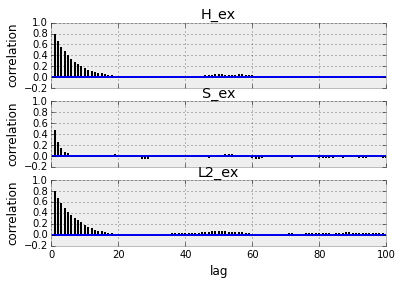

In [26]:
from pymc3 import summary, autocorrplot, traceplot
summary(trace, vars=['H_ex', 'S_ex', 'L2_ex'])
autocorrplot(trace, vars=['H_ex', 'S_ex', 'L2_ex'])
plt.show()

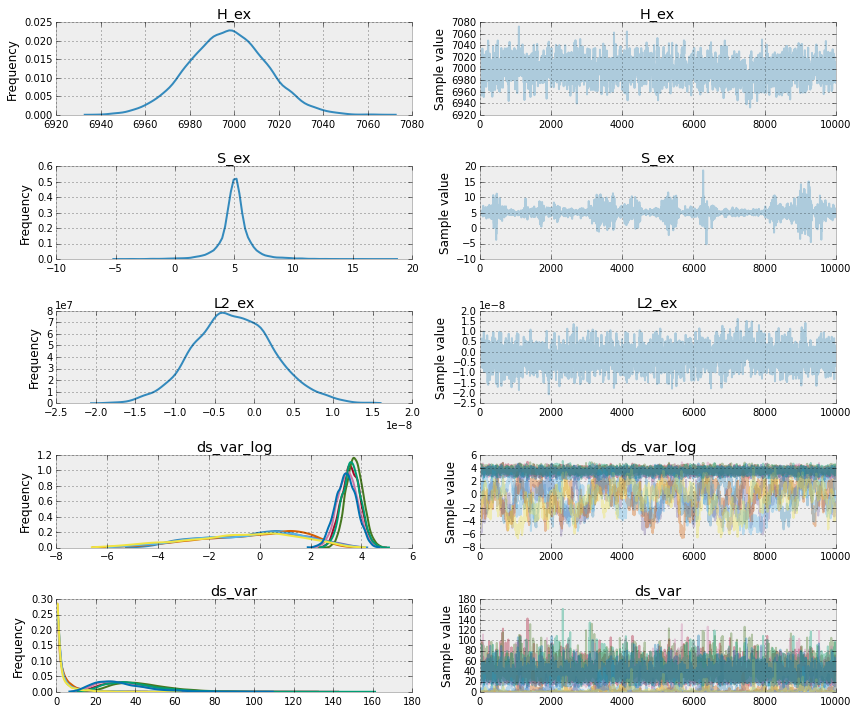

In [27]:
traceplot(trace)
plt.show()

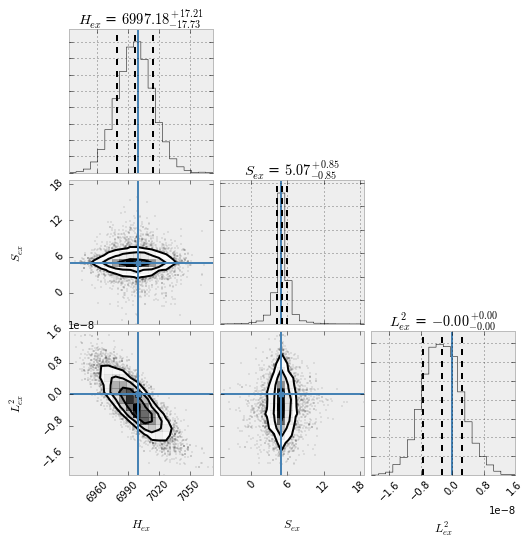

In [28]:
from corner import corner
from itertools import chain
data = np.vstack(chain([trace['H_ex'], trace['S_ex'], trace['L2_ex']])).T
corner(data, labels=[r"$H_{ex}$", r"$S_{ex}$", r"$L^2_{ex}$"],
       truths=[true_H_ex, true_S_ex, true_L2_ex],
       quantiles=[0.16, 0.5, 0.84],
       show_titles=True, title_args={"fontsize": 40}).show()

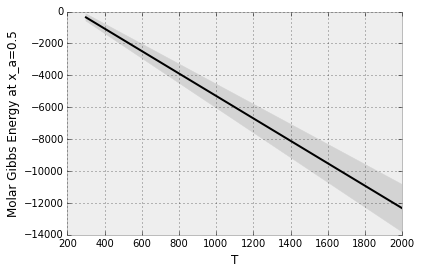

In [19]:
S_ex_tr, H_ex_tr = (trace['S_ex'], trace['H_ex'])
Tfit = np.linspace(300, 2000, 100)
Efit = energy(H_ex_tr[:, None], S_ex_tr[:, None], trace['L2_ex'][:, None], Tfit, 0.5, 0.5)
mu = Efit.mean(axis=0)
sigma = 2 * Efit.std(axis=0)
plt.plot(Tfit, mu, '-k')
plt.fill_between(Tfit, mu - sigma, mu + sigma, color='lightgray')

plt.xlabel('T')
plt.ylabel('Molar Gibbs Energy at x_a=0.5')

In [20]:
temp = 300 # temperature of interest

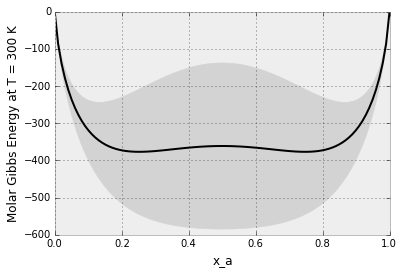

In [21]:
S_ex_tr, H_ex_tr = (trace['S_ex'], trace['H_ex'])
xfit = np.linspace(1e-8, 1.-1e-8, 100)
yfit = energy(H_ex_tr[:, None], S_ex_tr[:, None], trace['L2_ex'][:, None], temp, xfit, 1-xfit)
mu = yfit.mean(axis=0)
sigma = 2 * yfit.std(axis=0)
plt.plot(xfit, mu, '-k')
plt.fill_between(xfit, mu - sigma, mu + sigma, color='lightgray')

plt.xlim(0,1)
plt.xlabel('x_a')
plt.ylabel('Molar Gibbs Energy at T = {} K'.format(temp))

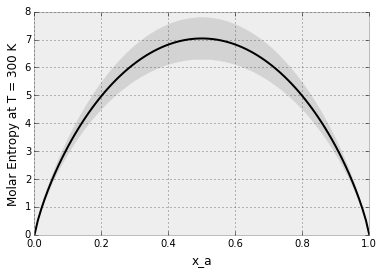

In [22]:
S_ex_tr, H_ex_tr = (trace['S_ex'], trace['H_ex'])
xfit = np.linspace(1e-8, 1.-1e-8, 100)
yfit = entropy(H_ex_tr[:, None], S_ex_tr[:, None], trace['L2_ex'][:, None], temp, xfit, 1-xfit)
mu = yfit.mean(axis=0)
sigma = 2 * yfit.std(axis=0)
plt.plot(xfit, mu, '-k')
plt.fill_between(xfit, mu - sigma, mu + sigma, color='lightgray')

plt.xlabel('x_a')
plt.ylabel('Molar Entropy at T = {} K'.format(temp))

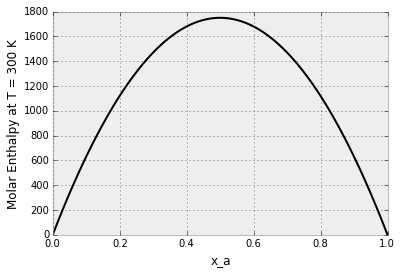

In [23]:
S_ex_tr, H_ex_tr = (trace['S_ex'], trace['H_ex'])
xfit = np.linspace(1e-8, 1.-1e-8, 100)
yfit = enthalpy(H_ex_tr[:, None], S_ex_tr[:, None], trace['L2_ex'][:, None], temp, xfit, 1-xfit)
mu = yfit.mean(axis=0)
sigma = 2 * yfit.std(axis=0)
plt.plot(xfit, mu, '-k')
plt.fill_between(xfit, mu - sigma, mu + sigma, color='lightgray')

plt.xlabel('x_a')
plt.ylabel('Molar Enthalpy at T = {} K'.format(temp))